<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/Pipeline_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [0]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#def learning curve

In [32]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


Automatically created module for IPython interactive environment


#Load data

In [33]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
public_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
PA_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
public_labels = df_train.Histology

In [0]:
PA_labels = df_test.Histology

#Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(public_data, public_labels, test_size=0.3, stratify=public_labels, random_state=3)

In [46]:
X_train.shape

(91, 107)

#Vettorizzare i label

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_labels_encoded = encoder.fit_transform(y_train)
test_labels_encoded = encoder.transform(y_test)

#Scalers

In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer

In [0]:
scalers_to_test = [StandardScaler(), RobustScaler()]

#DecisionTreeClassifier 

In [0]:
from sklearn.tree import DecisionTreeClassifier 

In [0]:
steps = [('scaler', StandardScaler()), ('red_dim', LinearDiscriminantAnalysis()), ('clf', DecisionTreeClassifier())]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
n_features_to_test = np.arange(1, 11)

In [0]:
parameteres = [{'scaler':scalers_to_test, 'red_dim':[LinearDiscriminantAnalysis()], 'red_dim__n_components':[2], 'clf__criterion':['gini', 'entropy']},
               {'scaler':scalers_to_test, 'red_dim':[PCA()], 'red_dim__n_components':n_features_to_test, 'clf__criterion':['gini', 'entropy']}]

In [0]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=3, verbose=1)

In [0]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 132 out of 132 | elapsed:    3.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('red_dim',
                                        LinearDiscriminantAnalysis(n_components=None,
                                                                   priors=None,
                                                                   shrinkage=None,
                                                                   solver='svd',
                                                                   store_covariance=False,
                                                                   tol=0.0001)),
                                       ('clf',
                                        DecisionTreeClassifi

In [0]:
print(f'score = {grid.score(X_test, y_test)}')

score = 0.475


In [0]:
print(grid.best_params_)

{'clf__criterion': 'gini', 'red_dim': PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'red_dim__n_components': 4, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


##Learning curve

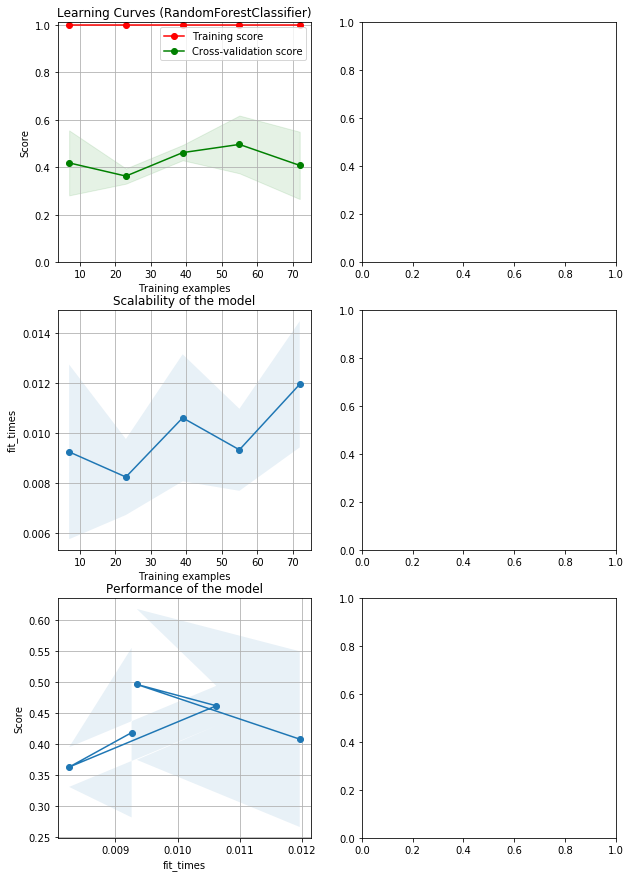

In [0]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (RandomForestClassifier)"

estimator = grid.best_estimator_
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.0, 1.01), cv=5, n_jobs=4)

plt.show()

#SVM linear 

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [0]:
steps = [('scaler', StandardScaler()), ('red_dim', PCA()), ('clf', SVC(kernel='linear', random_state=42))]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

In [0]:
# Designate distributions to sample hyperparameters from 
C_range = np.power(2, np.arange(-10, 11, dtype=float))

n=np.arange(4,10)



In [60]:
C_range

array([9.765625e-04, 1.953125e-03, 3.906250e-03, 7.812500e-03,
       1.562500e-02, 3.125000e-02, 6.250000e-02, 1.250000e-01,
       2.500000e-01, 5.000000e-01, 1.000000e+00, 2.000000e+00,
       4.000000e+00, 8.000000e+00, 1.600000e+01, 3.200000e+01,
       6.400000e+01, 1.280000e+02, 2.560000e+02, 5.120000e+02,
       1.024000e+03])

In [0]:
parameteres = [{'scaler':[RobustScaler()], 'red_dim':[PCA()], 'red_dim__n_components':list(n),'clf__C':list(C_range)}]

In [0]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=3, verbose=10, n_jobs=-1, scoring='accuracy')
#per questo usare parentesi tonde per i kernel

In [64]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1918s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1422s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2666s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 163 tasks      | elapsed:  

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('red_dim',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                       

In [0]:
print(f'score = {grid.score(X_test, y_test)}')

score = 0.425


In [0]:
print(grid.best_params_)

{'clf__C': 3.9338264231151037, 'red_dim': PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'red_dim__n_components': 4, 'scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)}


In [0]:
print(grid.best_params_)

{'clf__C': 3.3731497321345576, 'red_dim': PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'red_dim__n_components': 4, 'scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)}


##Learning curve

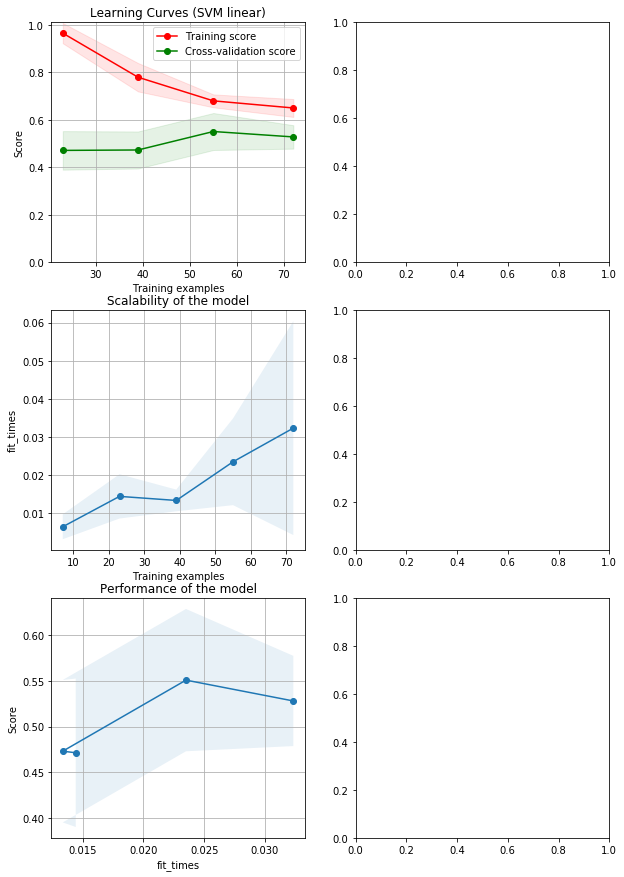

In [0]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (SVM linear)"

estimator = grid.best_estimator_
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.0, 1.01), cv=5, n_jobs=4)

plt.show()

#SVM rbf 

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [0]:
steps = [('scaler', StandardScaler()), ('red_dim', PCA()), ('clf', SVC(kernel='rbf', random_state=7007))]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

In [0]:
# Designate distributions to sample hyperparameters from 
np.random.seed(123)
g_range = np.random.uniform(0.0, 10, 50).astype(float)
C_range = np.random.normal(0, 10, 50 ).astype(float)

C_r = np.arange(0.2, 5, 0.2)
n = np.arange(4, 10)

# Check that gamma>0 and C>0 
C_range[C_range < 0] = 0.0001

In [0]:
#a =  np.arange(-15, 4, 2)
#g_range = np.exp2(a)

#b = np.arange(-5, 16, 2)
#C_range = np.exp2(b)

In [0]:
parameteres = [{'scaler':scalers_to_test, 'red_dim':[PCA()], 'red_dim__n_components':[n],'clf__C':list(C_range), 'clf__gamma':list(g_range)}]

In [0]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, verbose=10, n_jobs=-1, scoring='accuracy')
#per questo usare parentesi tonde per i kernel

In [0]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0149s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0809s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1212s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 476 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 580 tasks      | elapsed:  

ValueError: ignored

In [0]:
print(f'score = {grid.score(X_test, y_test)}')

score = 0.475


In [0]:
print(grid.best_params_)

{'clf__C': 9.787360059373466, 'clf__gamma': 6.964691855978616, 'red_dim': PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'red_dim__n_components': 7, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [0]:
C_range

array([3.1250e-02, 1.2500e-01, 5.0000e-01, 2.0000e+00, 8.0000e+00,
       3.2000e+01, 1.2800e+02, 5.1200e+02, 2.0480e+03, 8.1920e+03,
       3.2768e+04])

##Learning curve

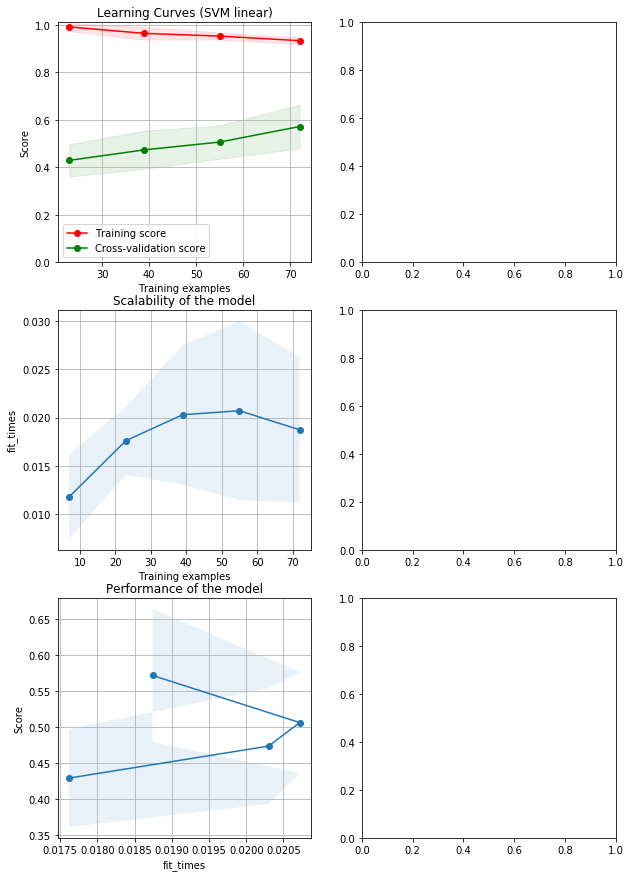

In [0]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (SVM rbf)"

estimator = grid.best_estimator_
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.0, 1.01), cv=5, n_jobs=4)

plt.show()

#SVM sigmoid 

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [0]:
steps = [('scaler', StandardScaler()), ('red_dim', PCA()), ('clf', SVC(kernel='sigmoid', random_state=200))]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

In [0]:
# Designate distributions to sample hyperparameters from 
np.random.seed(123)
g_range = np.random.uniform(0.0, 10, 50).astype(float)
C_range = np.random.normal(0, 10, 50 ).astype(float)

n=np.arange(4,11)

# Check that gamma>0 and C>0 
C_range[C_range < 0] = 0.0001

In [0]:
parameteres = [{'scaler':[StandardScaler()], 'red_dim':[PCA()], 'red_dim__n_components':list(n),'clf__C':list(C_range), 'clf__gamma':list(g_range)}]

In [0]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, verbose=10, n_jobs=-1, scoring='accuracy')
#per questo usare parentesi tonde per i kernel

In [0]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 17500 candidates, totalling 87500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1883s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0650s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1083s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1759s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 506 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 682 t

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('red_dim',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                       

In [0]:
print(f'score = {grid.score(X_test, y_test)}')

score = 0.525


In [0]:
print(grid.best_params_)

{'clf__C': 0.4549008063109716, 'clf__gamma': 4.809319014843609, 'red_dim': PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'red_dim__n_components': 4, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


##Learning curve

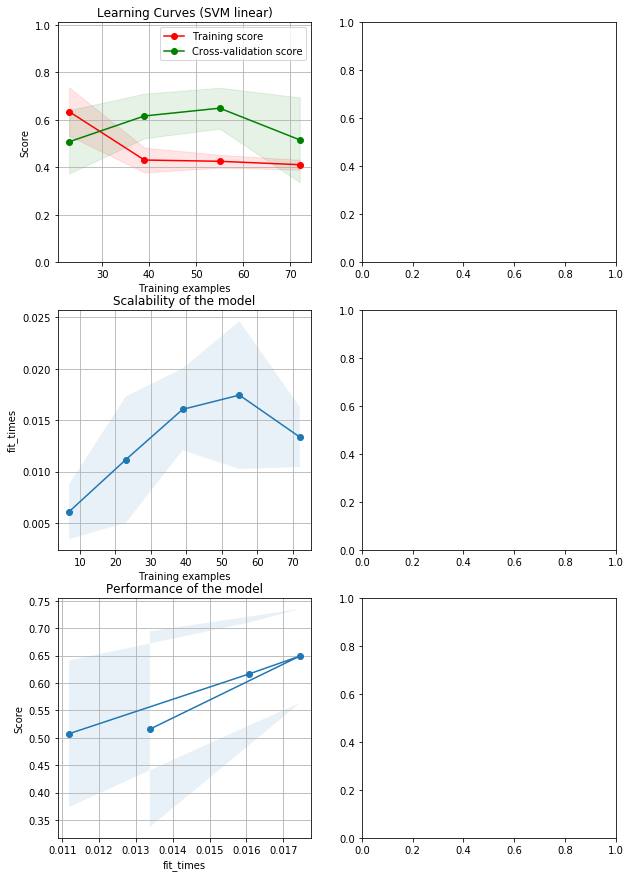

In [0]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (SVM sigmoid)"

estimator = grid.best_estimator_
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.0, 1.01), cv=5, n_jobs=4)

plt.show()

#RandomForestClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [0]:
steps = [('scaler', StandardScaler()), ('red_dim', PCA()), ('clf', RandomForestClassifier(random_state=7008))]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

In [0]:
# Designate distributions to sample hyperparameters from 
#max_f= np.random.normal(6, 3, 5).astype(int) #max_features
# Check max_features>0 & max_features<=total number of features
#max_f[max_f <= 0] = 1
#max_f[max_f > X_train.shape[1]] = X_train.shape[1]

n = np.arange(1, 11)

n_tree = np.arange(10, 120, 10)
n_tree = list(n_tree)

In [0]:
parameteres = [{'scaler':scalers_to_test, 'red_dim':[PCA()], 'red_dim__n_components':list(n), 
                'clf__n_estimators':n_tree}]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

In [0]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, verbose=1)

In [0]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1100 out of 1100 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('red_dim',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_

In [0]:
print(f'score = {grid.score(X_test, y_test)}')

NotFittedError: ignored

In [0]:
print(grid.best_params_)

{'clf__n_estimators': 40, 'red_dim': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'red_dim__n_components': 10, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}


{'scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True), 'red_dim__n_components': 7, 'red_dim': PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'clf__n_estimators': 60}

  score=0.65

##Learning curve

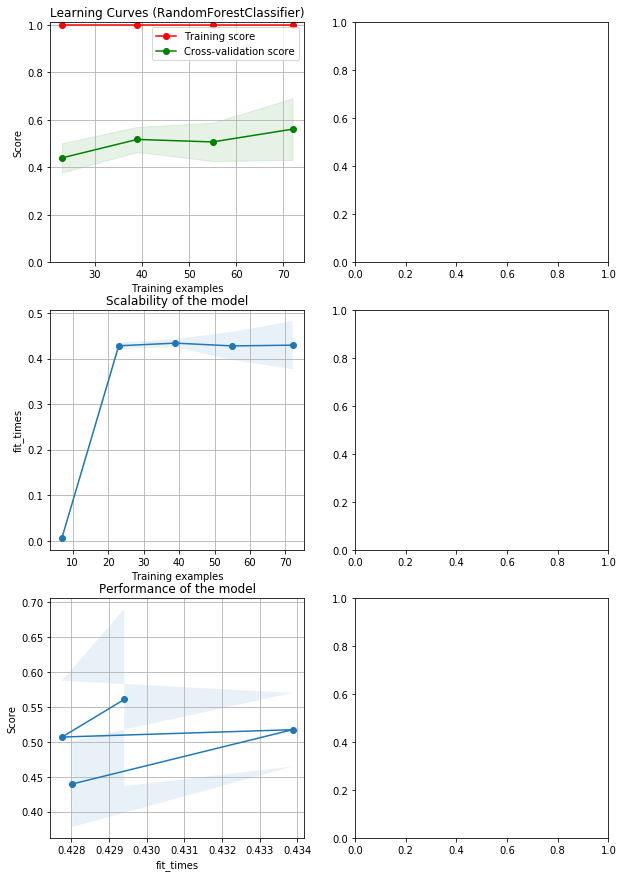

In [0]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (RandomForestClassifier)"

estimator = grid.best_estimator_
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.0, 1.01), cv=5, n_jobs=4)

plt.show()

##Prova con i best params

In [0]:
r_scaler = RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True, with_scaling=True)
s_scaler = StandardScaler()

In [0]:
X_train_scaled = s_scaler.fit_transform(X_train)
X_test_scaled = s_scaler.transform(X_test)

In [0]:
X_train_scaled = r_scaler.fit_transform(X_train)
X_test_scaled = r_scaler.transform(X_test)

In [0]:
pca = PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [0]:
rfc = RandomForestClassifier(random_state=0, n_estimators=1200)

In [0]:
rfc.fit(X_train_scaled_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
rfc.score(X_test_scaled_pca, y_test)

0.55

In [0]:
from sklearn.model_selection import validation_curve

np.random.seed(2)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

train_scores, valid_scores = validation_curve(RandomForestClassifier(), X_train_scaled_pca, y_train, "n_estimators", n_estimators, scoring="accuracy", cv=5)

In [0]:
indices = np.arange(y_train.shape[0])

In [0]:
train_scores.shape

(10, 5)

In [0]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

In [0]:
train_scores_mean.shape

(10,)

###Validation curve

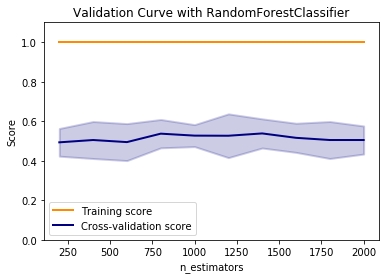

In [0]:
plt.title("Validation Curve with RandomForestClassifier")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(n_estimators, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(n_estimators, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

###Learning curve

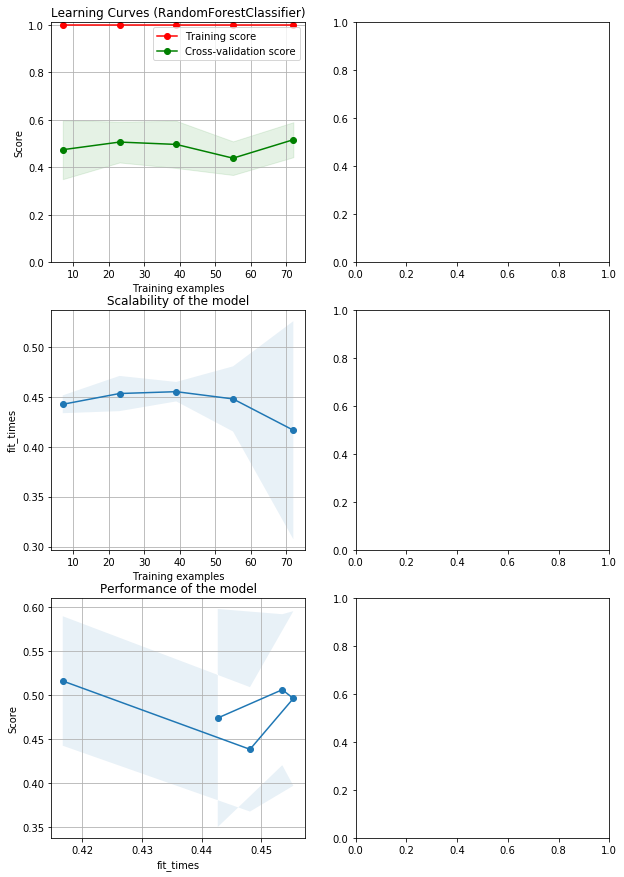

In [0]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (RandomForestClassifier)"

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X_train_scaled_pca, y_train, axes=axes[:, 0], ylim=(0.0, 1.01), cv=5, n_jobs=4)

plt.show()

##Hard Grid-search 

In [0]:
from sklearn.model_selection import RandomizedSearchCV # Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
              
              
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [0]:
steps = [('scaler', StandardScaler()), ('red_dim', PCA()), ('clf', RandomForestClassifier(random_state=0))]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

In [0]:
parameteres = [{'scaler':scalers_to_test, 'red_dim':[LinearDiscriminantAnalysis()], 'red_dim__n_components':[2], 
                'clf__n_estimators':n_estimators, 
                'clf__max_features':max_features,
                'clf__max_depth': max_depth,
                'clf__min_samples_split': min_samples_split,
                'clf__min_samples_leaf': min_samples_leaf,
                'clf__bootstrap': bootstrap},
               {'scaler':scalers_to_test, 'red_dim':[PCA()], 'red_dim__n_components':n_features_to_test, 
                'clf__n_estimators':n_estimators, 
                'clf__max_features':max_features,
                'clf__max_depth': max_depth,
                'clf__min_samples_split': min_samples_split,
                'clf__min_samples_leaf': min_samples_leaf,
                'clf__bootstrap': bootstrap}
                ]







In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(pipeline, param_distributions = parameteres, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('red_dim',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=None,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                                             ('clf',
                                              RandomForestClassifier(bootstrap=True,
             

In [0]:
rf_random.best_params_

{'clf__bootstrap': True,
 'clf__max_depth': None,
 'clf__max_features': 'sqrt',
 'clf__min_samples_leaf': 2,
 'clf__min_samples_split': 10,
 'clf__n_estimators': 1800,
 'red_dim': PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 'red_dim__n_components': 8,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [0]:
rf_random.score(X_test, y_test)

0.5

##Learning curve

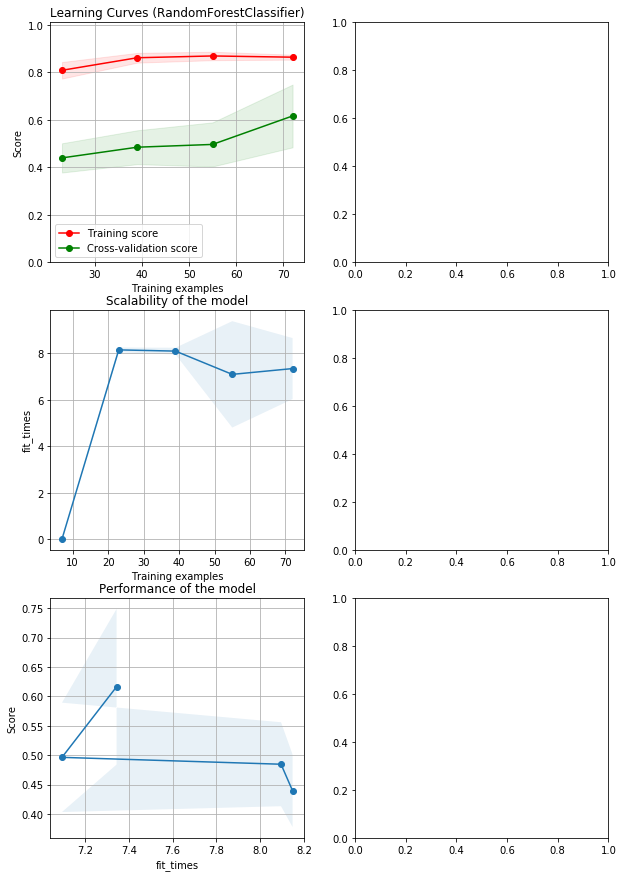

In [0]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (RandomForestClassifier)"

estimator = rf_random.best_estimator_
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.0, 1.01), cv=5, n_jobs=4)

plt.show()

In [0]:
C_range

array([9.78736006e+00, 2.23814334e+01, 1.00000000e-04, 1.00000000e-04,
       1.74371223e+01, 1.00000000e-04, 2.96832303e-01, 1.06931597e+01,
       8.90706391e+00, 1.75488618e+01, 1.49564414e+01, 1.06939267e+01,
       1.00000000e-04, 7.94862668e+00, 3.14271995e+00, 1.00000000e-04,
       1.41729905e+01, 8.07236535e+00, 4.54900806e-01, 1.00000000e-04,
       1.00000000e-04, 1.99524074e+00, 4.68439119e+00, 1.00000000e-04,
       1.16220405e+01, 1.00000000e-04, 1.00000000e-04, 1.03972709e+01,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.25523737e+01, 1.00000000e-04, 1.66095249e+01, 8.07308186e+00,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       2.08711336e+01, 1.64441230e+00, 1.15020554e+01, 1.00000000e-04,
       1.81035130e+00, 1.17786194e+01, 1.00000000e-04, 1.03111446e+01,
       1.00000000e-04, 1.00000000e-04])

In [0]:
g_range

array([6.96469186, 2.86139335, 2.26851454, 5.51314769, 7.1946897 ,
       4.2310646 , 9.80764198, 6.84829739, 4.80931901, 3.92117518,
       3.43178016, 7.29049707, 4.38572245, 0.59677897, 3.98044255,
       7.37995406, 1.8249173 , 1.75451756, 5.31551374, 5.31827587,
       6.34400959, 8.49431794, 7.24455325, 6.11023511, 7.22443383,
       3.22958914, 3.61788656, 2.28263231, 2.93714046, 6.30976124,
       0.9210494 , 4.33701173, 4.30862763, 4.93685098, 4.2583029 ,
       3.12261223, 4.26351307, 8.93389163, 9.44160018, 5.01836676,
       6.23952952, 1.15618395, 3.17285482, 4.14826212, 8.66309158,
       2.50455365, 4.83034264, 9.85559786, 5.19485119, 6.12894526])